<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Проверим-нашу-модель-на-адекватность,-сравнив-меру-F1-c-полученной-нашей-моделью." data-toc-modified-id="Проверим-нашу-модель-на-адекватность,-сравнив-меру-F1-c-полученной-нашей-моделью.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверим нашу модель на адекватность, сравнив меру F1 c полученной нашей моделью.</a></span></li></ul></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Заключение</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Для анализа выгружены следущие признаки:

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания
Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

И целевое признак:

Exited — факт ухода клиента

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
#Загрузим необходимые библиотеки

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
#Загрузим данные
import pandas as pd
df = pd.read_csv('/datasets/Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [2]:
#Загрузим информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
#Посмотрим описательную статистику.
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
#Посмотрим сколько пропущено значений.
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

*** Разберемся с пропущенными значениями. В столбце Tenure(сколько лет человек является клиентом банка) пропущено 909 значений,что составляет 9,09 процентов от общего объма,что довольно существенно,чтобы просто выкинуть их.**

In [5]:
# Посмотрим описательную статистику с пропущенными данными.
df[df['Tenure'].isnull()].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,909.000000,9.090000e+02,909.000000,909.000000,0.0,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,4866.386139,1.568981e+07,648.451045,38.647965,NaN,76117.341474,1.530253,0.710671,0.510451,99180.389373,0.201320
std,2909.604343,7.511225e+04,99.079381,9.785438,NaN,63105.690715,0.588452,0.453701,0.500166,56378.063765,0.401207
min,31.000000,1.556581e+07,359.000000,18.000000,NaN,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000
25%,2311.000000,1.562658e+07,580.000000,32.000000,NaN,0.000000,1.000000,0.000000,0.000000,49872.330000,0.000000
50%,4887.000000,1.568687e+07,647.000000,37.000000,NaN,96674.550000,1.000000,1.000000,1.000000,99444.020000,0.000000
75%,7306.000000,1.575680e+07,718.000000,43.000000,NaN,128554.980000,2.000000,1.000000,1.000000,145759.700000,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,NaN,206663.750000,4.000000,1.000000,1.000000,199390.450000,1.000000


*** Я остановлюсь на варианте заполнения пропусков "0", т.к удаление такого количества довольно деструктивно.А логичной замены в этом случае нет.**

In [6]:

# Заполним пропуски и приведем к целочисленному виду.
df['Tenure']=df['Tenure'].fillna(df['Tenure'].median()).astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#Пропущенных значений нет.Проверим на дубликаты.
df.duplicated().sum()

0

In [8]:
#Явных нет, проверим на неявные(через ID)
df['CustomerId'].duplicated().sum()

0

*** Поскольку нам предстоит обучать модели, то необходимо удалить данные,которые не несут математической ценности для алгоритма,а просто являются идентификаторами ( Это столбец RowNumber,который дублирует порядковый индекс.Это столбец CustomerId ,который является уникальным номером и который существенно усложнит обучение, и Surname , который является фамилией клиента.)***

In [9]:
#Удаляем лишние столбцы
df=df.drop(df.columns[[0, 1, 2]], axis=1)

**Теперь у нас остались только необходимые для обучения данные. Однако,среди них есть категориальные признаки,которые необходимо преобразовать в численные. Применим One-Hot Encoding.**

In [10]:
# One-Hot Encoding необходимо добавить параметр Drop firt для избежания дамми-ловушкb.
df_ohe=pd.get_dummies(df,drop_first=True)
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


***Данные подготовлены,теперь разобьем данные на 3 выборки Разобьем данные по правилу 60-20-20 (60% для обучения, 20% для проверки, 20% для тестирования).***

In [11]:
# Разобьем сначала на обучающее и проверочное 
df_train, df_test = train_test_split(df_ohe, test_size=0.4,random_state=12345)
features_train = df_train.drop('Exited', axis=1)
target_train = df_train['Exited']
features = df_test.drop('Exited', axis=1)
target = df_test['Exited']
# Теперь проверочную выборку разобьем на валидационную и тестовую
features_valid, features_test, target_valid, target_test = train_test_split(features, target, test_size=0.5, random_state=12345,stratify=target)
print("Размер тренировочной выборки", features_train.shape)
print("Размер валидационной выборки",features_valid.shape)
print("Размер тестовой выборки",features_test.shape)

Размер тренировочной выборки (6000, 11)
Размер валидационной выборки (2000, 11)
Размер тестовой выборки (2000, 11)


*** Данные разбиты на выборки, последний шаг это стандартизация данных,чтобы модель не сочла какой-либо из признаков более значимым***

In [12]:
# Выделим столбцы с необходимыми признаками
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']
# Проводим масштабирование по всем выборкам.
scaler = StandardScaler()
scaler.fit(features_train[numeric])
pd.options.mode.chained_assignment = None
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,1,0,0


In [13]:
pd.options.mode.chained_assignment = None
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2592,-1.530609,0.101325,-0.009707,-0.462487,0.830152,1,1,0.962332,1,0,1
4772,-1.717536,0.480939,0.354288,-0.239964,-0.891560,1,1,-0.803764,0,1,1
4661,1.325215,0.386035,-1.829679,-1.233163,-0.891560,0,1,-1.451198,0,0,0
7541,0.733280,-1.037515,-0.373701,-1.233163,0.830152,1,1,0.422391,0,0,1
9627,-0.118274,-0.752805,-0.737696,1.235143,-0.891560,1,0,-0.685301,0,1,1


In [14]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
239,0.525584,-1.037515,-1.101690,0.073691,0.830152,0,1,1.096558,0,0,1
4256,-0.585591,3.517846,1.446272,0.927516,-0.891560,1,1,-1.490163,0,1,0
9055,-0.232507,1.524876,-1.101690,-1.233163,-0.891560,1,1,0.116123,0,0,1
6865,0.868283,-1.227322,-0.009707,0.128656,-0.891560,0,1,1.533442,1,0,0
1921,0.058267,-0.373192,-0.009707,0.801770,-0.891560,0,0,0.984840,0,0,0


## Исследование задачи

***Сначала обучим модели.Для каждой из моделей используем 2 метрики качества: Accurance(доля правильных ответов алгоритмов) и F1 ,которая является средней гармонической метрик precision(Точность.эту метрику можно интерпретировать как долю объектов,определенных моделью как положительные и являющимися такими) и recall (Полнота.Эта метрика показывает какую долю объектов положительного класса из всех положительных объектов нашла модель).***

*** Первой будет модель логистической регрессии ***

Accurance модели LogisticRegression 0.7915
-----------------------------------------------------------------------
F1 модели LogisticRegression: 0.3061564059900166
-----------------------------------------------------------------------
Матрица путаницы
[[1491   88]
 [ 329   92]]
-----------------------------------------------------------------------
AUC-ROC модели LogisticRegression 0.7547803038394365


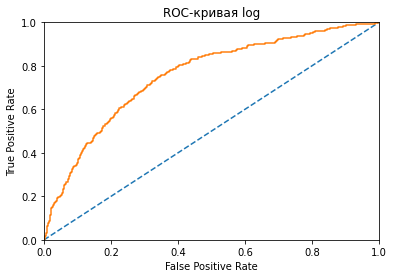

In [15]:
# Зададим модель
model = LogisticRegression(solver='liblinear',max_iter=1000)
# Обучим ее на тренировочной выборке
model.fit(features_train, target_train)
# Получим прогноз на валидационной выборке.
predicted_valid = model.predict(features_valid) 
# Получим массив вероятности каждого целевого класса
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
#Построим график ROC-кривой
fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая log')
# Выведем на экран интересующие нас метрики.
print('Accurance модели LogisticRegression',accuracy_score(target_valid,predicted_valid))
print('-----------------------------------------------------------------------')
print("F1 модели LogisticRegression:",f1_score(target_valid,predicted_valid))
print('-----------------------------------------------------------------------')
print('Матрица путаницы')
print(confusion_matrix(target_valid,predicted_valid))
print('-----------------------------------------------------------------------')
print("AUC-ROC модели LogisticRegression",roc_auc_score(target_valid,probabilities_one_valid))


***Далее обучим модель Desicion tree. Здесь мы напишем цикл перебора гиперпараметра для этой модели Max_depth, чтобы получить модель с наивысшей Accurance и рассчитаем для нее метрику F1.***

Глубина дерева: 6
Accurance модели DecisionTreeClassifier: 0.829
-----------------------------------------------------------------------
F1 модели DecisionTreeClassifier 0.5670731707317074
-----------------------------------------------------------------------
Матрица путаницы
[[1470  109]
 [ 233  188]]
-----------------------------------------------------------------------
AUC-ROC модели DecisionTreeClassifier 0.7676368428257458


Text(0.5, 1.0, 'ROC-кривая DecisionTreeClassifier')

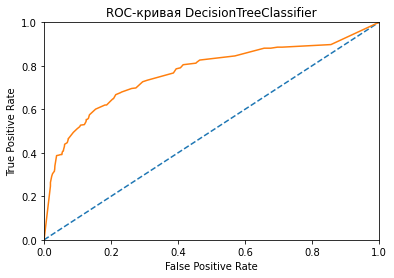

In [16]:
best_f1 = 0
best_depth = 0
for depth in range(1,10):
    model = DecisionTreeClassifier(max_depth=depth,random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1=f1_score(target_valid,predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth        
print("Глубина дерева:", best_depth)
print("Accurance модели DecisionTreeClassifier:",model.score(features_valid, target_valid))
print('-----------------------------------------------------------------------')
print("F1 модели DecisionTreeClassifier",best_f1)
print('-----------------------------------------------------------------------')
print('Матрица путаницы')
print(confusion_matrix(target_valid,predicted_valid))
print('-----------------------------------------------------------------------')
print("AUC-ROC модели DecisionTreeClassifier",roc_auc_score(target_valid,probabilities_one_valid))

#Построим график ROC-кривой
fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая DecisionTreeClassifier')

***И,наконец, модель RandomForest с циклами для 2х гиперпараметров(max_depth и n_estimators)***

Глубина дерева: 15 Количество деревьев: 14
-----------------------------------------------------------------------
Accurance модели RandomForestClassifier: 0.847
-----------------------------------------------------------------------
F1 модели RandomForestClassifier 0.5748148148148148
-----------------------------------------------------------------------
Матрица путаницы
[[1507   72]
 [ 234  187]]
-----------------------------------------------------------------------
AUC-ROC модели DecisionTreeClassifier 0.8366926961500334


Text(0.5, 1.0, 'ROC-кривая RandomForestClassifier')

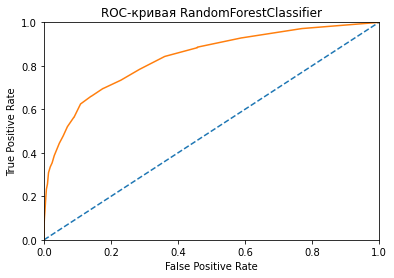

In [17]:

best_f1 = 0
best_depth = 0
for depth in range(1,25):
    for est in range(1,25):
        for sample_split in range (2,5):
            model = RandomForestClassifier(max_depth=depth, n_estimators=est,random_state=12345)                              
            model.fit(features_train, target_train)
            predicted_valid = model.predict(features_valid)
            f1=f1_score(target_valid,predicted_valid)
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            if f1 > best_f1:
                best_f1 = f1
                best_depth = depth
                best_est = est               
print("Глубина дерева:", best_depth, "Количество деревьев:",best_est)
print('-----------------------------------------------------------------------')
print("Accurance модели RandomForestClassifier:",model.score(features_valid, target_valid))
print('-----------------------------------------------------------------------')
print("F1 модели RandomForestClassifier",best_f1)
print('-----------------------------------------------------------------------')
print('Матрица путаницы')
print(confusion_matrix(target_valid,predicted_valid))
print('-----------------------------------------------------------------------')
print("AUC-ROC модели DecisionTreeClassifier",roc_auc_score(target_valid,probabilities_one_valid))

#Построим график ROC-кривой
fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая RandomForestClassifier')

***Итак,обучив 3 модели и получив их метрики качества можно сделать вывод,что при высокой доле правильных ответов (минимальное значение у модели логистической регрессии = 80 %) метрика F1 невысока (максимальное значение у модели случайного леса = 0.56) ,а значит ,вероятнее всего мы имеем дело с дисбалансом в данных.***

In [18]:
#Посмотрим какую долю составляют ушедшие клиенттыю
print('Доля ушедших клиентов:',df['Exited'].sum()/len(df['Exited']))

Доля ушедших клиентов: 0.2037


***Таким образом наше предположение подтвердилось - у нас имеется дисбаланс примерно 1 к 4 в пользу отрицательных меток.***

## Борьба с дисбалансом

***Для устранения дисбаланса воспользуемся техникой  upsampling (от англ. up, «вверх»; sampling, «выборка»).
Преобразование проходит в несколько этапов:***
    
-Разделить обучающую выборку на отрицательные и положительные объекты;

-Скопировать несколько раз положительные объекты;

-С учётом полученных данных создать новую обучающую выборку;

-Перемешать данные: идущие друг за другом одинаковые вопросы не помогут обучению.

In [19]:

#Напишем функцию для увеличения данных по ушедшим клиентам
def upsampling (features,target,repeat):
    #Выделим целевые значения с признакми в тестовой выборке 
    target_one=target[target==1]
    target_null=target[target==0]
    features_one=features[target==1]
    features_null=features[target==0]
    # Объединим увеличенные признаки 
    upsampling_features=pd.concat([features_null]+[features_one]*repeat)
    upsampling_target=pd.concat([target_null]+[target_one]*repeat)
    # Применим функцию Shufll для перемешивания
    upsampling_features,upsampling_target=shuffle(upsampling_features,upsampling_target,random_state=1234)
    
    return upsampling_features,upsampling_target

In [20]:
# Применим функцию к тренировочной выборке с необходимой пропорцией
features_ups,target_ups= upsampling(features_train,target_train,4)
#Посмотрим какой стала доля  ушедших клиентов
print('Доля ушедших клиентов:',target_ups.sum()/len(target_ups))
print('Размер обучающей выборки',target_ups.shape)


Доля ушедших клиентов: 0.49895702962035876
Размер обучающей выборки (9588,)


***Итак целевые признаки по методу upsampling сбалансированы. Применим второй метод обратный этому- downsample.Здесь мы будем не увеличивать количество ушедших, а уменьшим количество оставшихся до нужной пропорции.Шаги идентичны предыдущим***



In [21]:
def downsample (features, target, fraction):
    features_null = features[target == 0]
    features_one = features[target == 1]
    target_null = target[target == 0]
    target_one = target[target == 1]

    downsampled_features = pd.concat([features_null.sample(frac=fraction,random_state=12345)] + [features_one])
    downsampled_target = pd.concat([target_null.sample(frac=fraction,random_state=12345)] + [target_one])
    downsampled_features, downsampled_target = shuffle(downsampled_features, downsampled_target, random_state=12345)
    return downsampled_features, downsampled_target

In [22]:
features_dws,target_dws = downsample(features_train,target_train, 0.25)
print('Доля ушедших клиентов:',target_dws.sum()/len(target_dws))
print('Размер обучающей выборки',target_dws.shape)

Доля ушедших клиентов: 0.49895702962035876
Размер обучающей выборки (2397,)


***Итак, мы получили 2 обучающие сбалансированные выборки. Проверим их на 3х предыдущих моделях(с поиском лучших гиперпараметров) и посмотрим как изменились метрики качества.***

 # 3.1.1 Логистическая регрессия на данных upsample.

In [23]:

model = LogisticRegression(solver='liblinear',max_iter=1000)
model.fit(features_ups,target_ups)
predicted_valid = model.predict(features_valid) 
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
# Выведем на экран интересующие нас метрики.
print('Accurance модели LogisticRegression',accuracy_score(target_valid,predicted_valid))
print('-----------------------------------------------------------------------')
print("F1 модели LogisticRegression:",f1_score(target_valid,predicted_valid))
print('-----------------------------------------------------------------------')
print('Матрица путаницы')
print(confusion_matrix(target_valid,predicted_valid))
print('-----------------------------------------------------------------------')
print("AUC-ROC модели LogisticRegression",roc_auc_score(target_valid,probabilities_one_valid))

Accurance модели LogisticRegression 0.704
-----------------------------------------------------------------------
F1 модели LogisticRegression: 0.494017094017094
-----------------------------------------------------------------------
Матрица путаницы
[[1119  460]
 [ 132  289]]
-----------------------------------------------------------------------
AUC-ROC модели LogisticRegression 0.7588178572986601


# 3.1.2  Логистическая регрессия на данных downsample

In [24]:

model = LogisticRegression(solver='liblinear',max_iter=1000)
model.fit(features_dws,target_dws)
predicted_valid = model.predict(features_valid) 
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# Выведем на экран интересующие нас метрики.
print('Accurance модели LogisticRegression',accuracy_score(target_valid,predicted_valid))
print('-----------------------------------------------------------------------')
print("F1 модели LogisticRegression:",f1_score(target_valid,predicted_valid))
print('-----------------------------------------------------------------------')
print('Матрица путаницы')
print(confusion_matrix(target_valid,predicted_valid))
print('-----------------------------------------------------------------------')
print("AUC-ROC модели LogisticRegression",roc_auc_score(target_valid,probabilities_one_valid))

Accurance модели LogisticRegression 0.7045
-----------------------------------------------------------------------
F1 модели LogisticRegression: 0.4961636828644501
-----------------------------------------------------------------------
Матрица путаницы
[[1118  461]
 [ 130  291]]
-----------------------------------------------------------------------
AUC-ROC модели LogisticRegression 0.7562063845694454


*** Итог обучения на новых тренировочных модели логистической регрессии:***

-Значение Accurance уменьшилось. Было 0.80, стало 0.7 на обеих выборках

-Значение F1 увеличилось. Было 0.32 , стало 0.49 на обеих выборках.

-Значение AUC-ROC не изменилось.

На данной модели заданного значения F1 получить не удалось.

# 3.2.1 Дерево решений на данных upsample.

In [25]:
best_f1 = 0
best_depth = 0
for depth in range(1,10):
    model = DecisionTreeClassifier(max_depth=depth,random_state=12345)
    model.fit(features_ups,target_ups)
    predicted_valid = model.predict(features_valid)
    f1=f1_score(target_valid,predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth        
print("Глубина дерева:", best_depth)
print("Accurance модели DecisionTreeClassifier:",model.score(features_valid, target_valid))
print('-----------------------------------------------------------------------')
print("F1 модели DecisionTreeClassifier",best_f1)
print('-----------------------------------------------------------------------')
print('Матрица путаницы')
print(confusion_matrix(target_valid,predicted_valid))
print('-----------------------------------------------------------------------')
print("AUC-ROC модели DecisionTreeClassifier",roc_auc_score(target_valid,probabilities_one_valid))

Глубина дерева: 5
Accurance модели DecisionTreeClassifier: 0.7625
-----------------------------------------------------------------------
F1 модели DecisionTreeClassifier 0.59375
-----------------------------------------------------------------------
Матрица путаницы
[[1248  331]
 [ 144  277]]
-----------------------------------------------------------------------
AUC-ROC модели DecisionTreeClassifier 0.7727386917664898


# 3.2.2 Дерево решений на данных downsample.

In [26]:
best_f1 = 0
best_depth = 0
for depth in range(1,10):
    model = DecisionTreeClassifier(max_depth=depth,random_state=12345)
    model.fit(features_dws,target_dws)
    predicted_valid = model.predict(features_valid)
    f1=f1_score(target_valid,predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth        
print("Глубина дерева:", best_depth)
print("Accurance модели DecisionTreeClassifier:",model.score(features_valid, target_valid))
print('-----------------------------------------------------------------------')
print("F1 модели DecisionTreeClassifier",best_f1)
print('-----------------------------------------------------------------------')
print('Матрица путаницы')
print(confusion_matrix(target_valid,predicted_valid))
print('-----------------------------------------------------------------------')
print("AUC-ROC модели DecisionTreeClassifier",roc_auc_score(target_valid,probabilities_one_valid))

Глубина дерева: 5
Accurance модели DecisionTreeClassifier: 0.736
-----------------------------------------------------------------------
F1 модели DecisionTreeClassifier 0.5802469135802469
-----------------------------------------------------------------------
Матрица путаницы
[[1178  401]
 [ 127  294]]
-----------------------------------------------------------------------
AUC-ROC модели DecisionTreeClassifier 0.7539649707638406


***Итог обучения на новых тренировочных модели дерева решений:***

-Значение Accurance уменьшилось. Было 0.86, стало 0.77 на обеих выборках

-Значение F1 увеличилось. Было 0.54 , стало 0.58 на обеих выборкe downsample и 0.61 на выборке upsample.

-Значение AUC-ROC увеличилось.Было 0.77 , стало 0.78 на выборке upsample.


# 3.3.1 Случайный лес на данных upsample.

In [27]:
best_f1 = 0
best_depth = 0
for depth in range(1,25):
    for est in range(1,25):
        for sample_split in range (2,5):
            model = RandomForestClassifier(max_depth=depth, n_estimators=est,random_state=12345)                              
            model.fit(features_ups,target_ups)
            predicted_valid = model.predict(features_valid)
            f1=f1_score(target_valid,predicted_valid)
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            if f1 > best_f1:
                best_f1 = f1
                best_depth = depth
                best_est = est               
print("Глубина дерева:", best_depth, "Количество деревьев:",best_est)
print('-----------------------------------------------------------------------')
print("Accurance модели RandomForestClassifier:",model.score(features_valid, target_valid))
print('-----------------------------------------------------------------------')
print("F1 модели RandomForestClassifier",best_f1)
print('-----------------------------------------------------------------------')
print('Матрица путаницы')
print(confusion_matrix(target_valid,predicted_valid))
print('-----------------------------------------------------------------------')
print("AUC-ROC модели DecisionTreeClassifier",roc_auc_score(target_valid,probabilities_one_valid))

Глубина дерева: 9 Количество деревьев: 23
-----------------------------------------------------------------------
Accurance модели RandomForestClassifier: 0.849
-----------------------------------------------------------------------
F1 модели RandomForestClassifier 0.6252676659528908
-----------------------------------------------------------------------
Матрица путаницы
[[1473  106]
 [ 196  225]]
-----------------------------------------------------------------------
AUC-ROC модели DecisionTreeClassifier 0.834202319938504


# 3.3.2 Случайный лес на данных dowsample.

In [28]:
best_f1 = 0
best_depth = 0
for depth in range(1,25):
    for est in range(1,25):
        for sample_split in range (2,5):
            model = RandomForestClassifier(max_depth=depth, n_estimators=est,random_state=12345)                              
            model.fit(features_dws,target_dws)
            predicted_valid = model.predict(features_valid)
            f1=f1_score(target_valid,predicted_valid)
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            if f1 > best_f1:
                best_f1 = f1
                best_depth = depth
                best_est = est               
print("Глубина дерева:", best_depth, "Количество деревьев:",best_est)
print('-----------------------------------------------------------------------')
print("Accurance модели RandomForestClassifier:",model.score(features_valid, target_valid))
print('-----------------------------------------------------------------------')
print("F1 модели RandomForestClassifier",best_f1)
print('-----------------------------------------------------------------------')
print('Матрица путаницы')
print(confusion_matrix(target_valid,predicted_valid))
print('-----------------------------------------------------------------------')
print("AUC-ROC модели DecisionTreeClassifier",roc_auc_score(target_valid,probabilities_one_valid))

Глубина дерева: 6 Количество деревьев: 10
-----------------------------------------------------------------------
Accurance модели RandomForestClassifier: 0.772
-----------------------------------------------------------------------
F1 модели RandomForestClassifier 0.5998125585754451
-----------------------------------------------------------------------
Матрица путаницы
[[1242  337]
 [ 119  302]]
-----------------------------------------------------------------------
AUC-ROC модели DecisionTreeClassifier 0.8357171546379967


***Итог обучения на новых тренировочных модели случайного леса:***

-Значение Accurance уменьшилось. Было 0.86, стало 0.84 на увеличенной выборке.

-***Значение F1 увеличилось. Было 0.56 , стало 0.59 на downsample и 0.62 на выборке upsample.***

-Значение AUC-ROC не изменилось осталось 0.83.

***Таким образом нашим чемпионом становится модель случайного леса
,обученная на увеличенной сбалансированной выборке.Да, доля правильных ответов незначительно уменьшилась
уменьшилась, но нам удалось увеличить сбалансированность через метрику F1 точность и полноту прогнозов,что в условиях задачи бинарной классификации с несбалансированными данными намного важнее и получить выше требуемого значения метрики F1 0.59
. А также добиться высокого значения AUC-ROC ( 0.85 ),показывающее насколько "неслучайно" наша модель определяет класс.***

## Тестирование модели

*** Теперь проверим нашу лучшую модель на тестовой выборке.***

Модель случайного леса с этими гиперпараметрами---глубина дерева: 9 количество деревьев: 23

Accurance модели RandomForestClassifier: 0.8185
-----------------------------------------------------------------------
F1 модели RandomForestClassifier 0.6182965299684542
-----------------------------------------------------------------------
Матрица путаницы
[[1343  237]
 [ 126  294]]
-----------------------------------------------------------------------
AUC-ROC модели RandomForestClassifier 0.8560247136829415


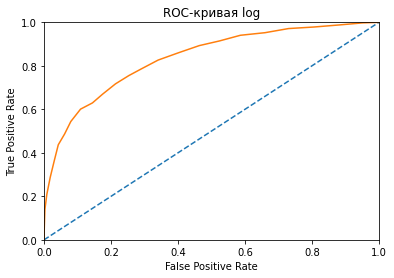

In [29]:
model = RandomForestClassifier(max_depth=9, n_estimators=23,random_state=12345)                              
model.fit(features_ups,target_ups)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая log')
print("Accurance модели RandomForestClassifier:",model.score(features_test, target_test))
print('-----------------------------------------------------------------------')
print("F1 модели RandomForestClassifier",f1_score(target_test,predicted_test))
print('-----------------------------------------------------------------------')
print('Матрица путаницы')
print(confusion_matrix(target_test,predicted_test))
print('-----------------------------------------------------------------------')
print("AUC-ROC модели RandomForestClassifier",roc_auc_score(target_test,probabilities_one_test))

### Проверим нашу модель на адекватность, сравнив меру F1 c полученной нашей моделью.

In [31]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
print("F1 дамми-модели",f1_score(dummy_model.predict(features_test), target_test))

F1 дамми-модели 0.34710743801652894


*** Как мы видим значение F1 нашей модели выше,а значит модель адекватна.***

## Заключение

***В рамках этой работы нам необходимо было построить модель,предсказывающую отток клиентов из банка на основании данных о поведении прошлых клиентов, с предельно высоким значением F1 не менее 0,59.***

*** На этапе подготовки данных было: ***

-заполнены отсутствующие значения в одном из столбцов.

-проведена проверка на дубликаты полные и мнимые.

-удалены столбцы, не несущие математической ценности для обучения.

-категориальные данные преобразованы методом OHE.

-все численные признаки были стандартизированы.

-данные разбиты на тренировочную(60%),валидационную(20%),тестовую(20%) выборку.

*** В ходе первичного обучения было использовано 3 модели (Логистческой регрессии,Дерева решений и Модель случайного леса с переборами гиперпараметров). Необходимого значения метрики достичь не удалось , а также был выявлен дисбаланс в данных.*** 

*** Дисбаланс был устранен путем увеличения положительных и уменьшением отрицательных меток пропорционально первичным данным.***

*** С помощью новых обучающих выборок были вновь обучены модели с перебором гиперпараметров.***

*** По итогам повторного обучения на валидационной выборке наилучший результат показала модель случайного леса с гиперпараметрами max_depth=9, n_estimators=23 .Обучение было на выборке с увеличенным классом положительных меток***

*** На тестовой выборке эта модель показала следущие метрики.***

- Доля правильных ответов 0.81

- Ключевая метрика для задачи классификации F1 - 0.61 . Заданное значение достигнуто.

- AUC-ROC (мера способности классификатора различать классы) - 0.85,что также очень высокий показатель, а график ROC-кривая помогает визуализировать, насколько хорошо работает классификатор машинного обучения.

*** Рекомендовано использовать данную модель для прогнозирования потенциального оттока клиентов из банка.***